In [ ]:
import zipfile
with zipfile.ZipFile("/content/thyroid_cancer.zip", "r") as zip_ref:
    zip_ref.extractall("dataset_folder")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('/content/thyroid_cancer.csv')

# Display basic information
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting the dataset into features and target
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

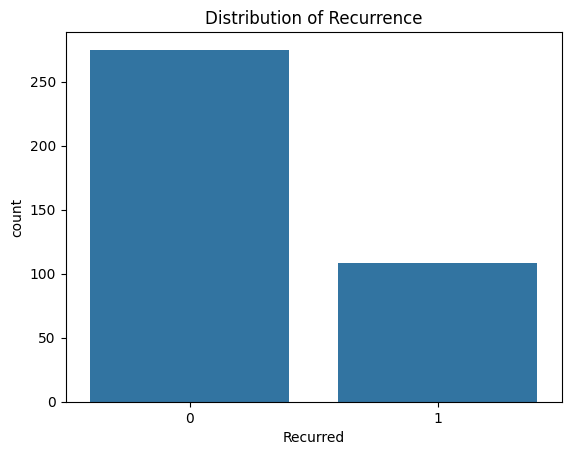

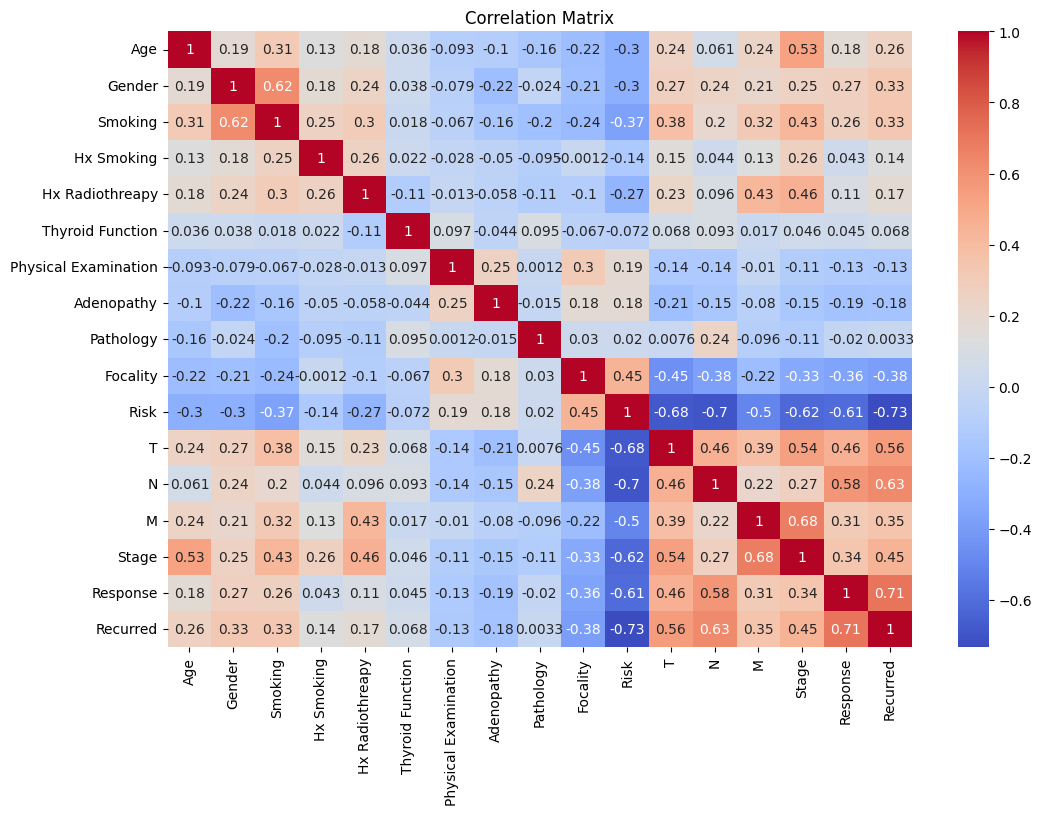

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
sns.countplot(x=y)
plt.title('Distribution of Recurrence')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

Logistic Regression: 0.8759 (+/- 0.0480)
Random Forest: 0.9476 (+/- 0.0319)
Gradient Boosting: 0.9444 (+/- 0.0338)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("-" * 40)

Model: Logistic Regression
Accuracy: 0.9351
Precision: 0.9375
Recall: 0.7895
F1-Score: 0.8571
ROC-AUC: 0.8861
----------------------------------------
Model: Random Forest
Accuracy: 0.9870
Precision: 1.0000
Recall: 0.9474
F1-Score: 0.9730
ROC-AUC: 0.9737
----------------------------------------
Model: Gradient Boosting
Accuracy: 0.9740
Precision: 0.9474
Recall: 0.9474
F1-Score: 0.9474
ROC-AUC: 0.9651
----------------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9575


                 Feature  Importance
15              Response    0.408108
10                  Risk    0.145610
12                     N    0.110341
11                     T    0.085264
0                    Age    0.066096
7             Adenopathy    0.045900
14                 Stage    0.036522
6   Physical Examination    0.019516
1                 Gender    0.018036
9               Focality    0.017326
8              Pathology    0.012987
5       Thyroid Function    0.012667
2                Smoking    0.011966
13                     M    0.004550
3             Hx Smoking    0.004541
4        Hx Radiothreapy    0.000569


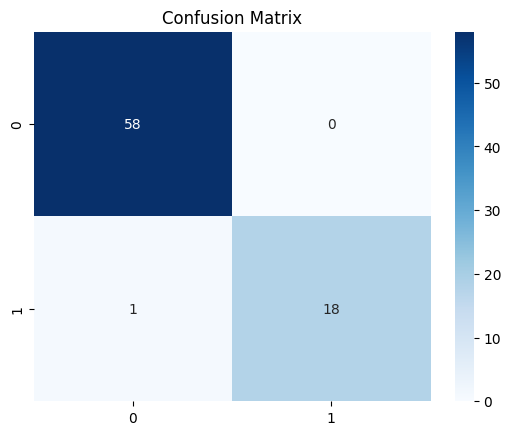

In [ ]:
from sklearn.metrics import confusion_matrix

# Feature Importance for Random Forest
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Confusion Matrix
y_pred = grid_search.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()